# Play_Tennis Data Using LogisticRegression

In [99]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [100]:
#importing the data set
df = pd.read_csv('play_tennis.csv')
#displaying head
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [101]:
#displaying info of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


In [102]:
#checking for null values
df.isnull().sum()

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

<Axes: xlabel='outlook', ylabel='play'>

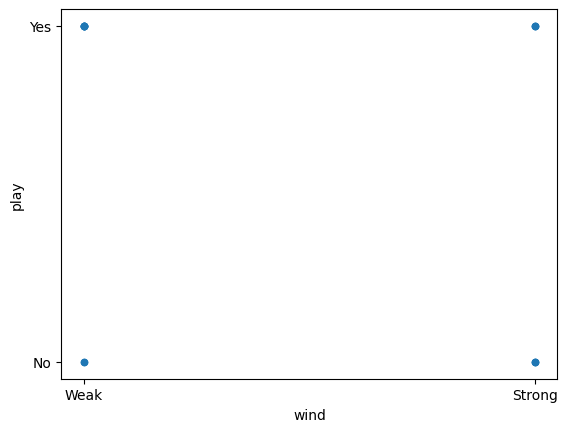

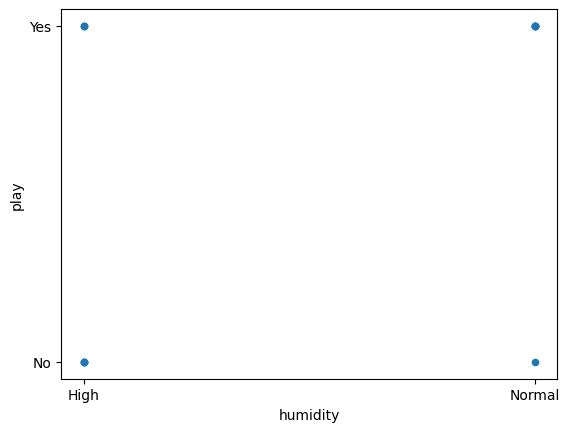

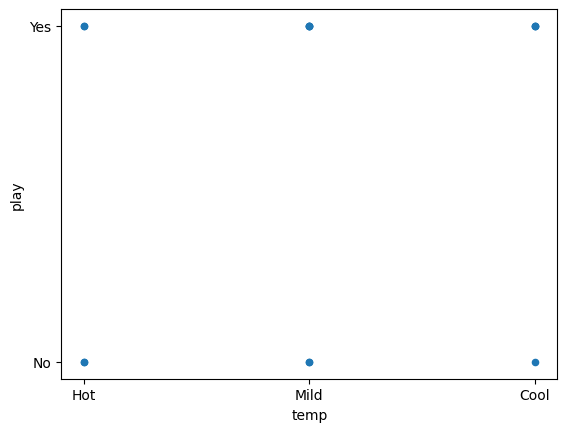

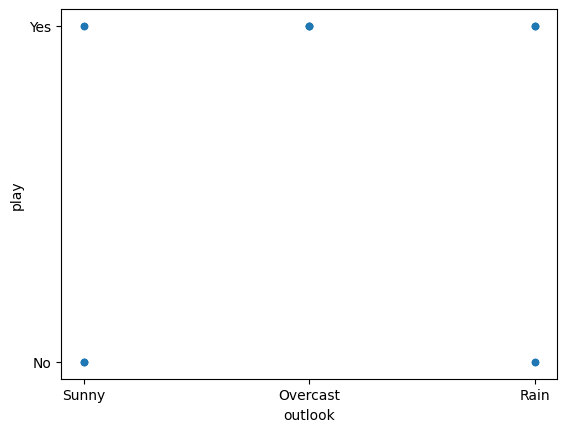

In [103]:
#creating bar scatter plot
df.plot(kind='scatter' , x='wind' , y='play')
df.plot(kind='scatter' , x='humidity' , y='play')
df.plot(kind='scatter' , x='temp' , y='play')
df.plot(kind='scatter' , x='outlook' , y='play')

In [104]:
#dropping the coloumn play in order to predict
X = df.drop('play', axis = 1)
X.head()

,day,outlook,temp,humidity,wind
0,D1,Sunny,Hot,High,Weak
1,D2,Sunny,Hot,High,Strong
2,D3,Overcast,Hot,High,Weak
3,D4,Rain,Mild,High,Weak
4,D5,Rain,Cool,Normal,Weak


In [105]:
#dropping unwanted coloumn day since no need for prediction
X = X.drop('day',axis = 1)
X.head()

,outlook,temp,humidity,wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


In [106]:
#since every coloumn in categorical value converting them
data_coloumns = ['outlook','temp','humidity','wind']
le = LabelEncoder()
for column in data_coloumns:
    X[column] = le.fit_transform(X[column])
X.head()

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1


In [107]:
#another technque for conversion by using get_dummies
X_e = pd.get_dummies(X , columns = ['outlook','temp','humidity','wind'])
X_e.head()

,outlook_0,outlook_1,outlook_2,temp_0,temp_1,temp_2,humidity_0,humidity_1,wind_0,wind_1
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1


In [108]:
#creating y data
y = df[['play']]
y.head()

,play
0,No
1,No
2,Yes
3,Yes
4,Yes


In [109]:
#converting this to numerical
y_e = le.fit_transform(y)
print(y_e)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
#creating train split data
X_train , X_test , y_train , y_test = train_test_split(X , y_e , random_state = 24, test_size = 0.3)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((9, 4), (5, 4), (9,), (5,))

In [112]:
#creating model
model = LogisticRegression()
model = model.fit(X_train,y_train)
model

LogisticRegression()

In [113]:
#predicting the value
y_predict = model.predict(X_test)
y_predict

array([1, 0, 1, 1, 1])

In [114]:
#importing libraries for accuracy
from sklearn.metrics import accuracy_score
print("accuracy_score : ",accuracy_score(y_test , y_predict))

accuracy_score :  0.4


In [115]:
#creating confusin matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test , y_predict)
con_mat

array([[0, 2],
       [1, 2]])

<Axes: >

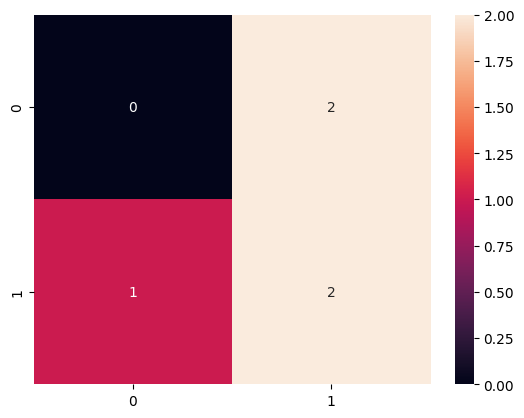

In [116]:
#creating heat map
import seaborn as sns
sns.heatmap(con_mat , annot = True)